<a href="https://colab.research.google.com/github/nkmin0/2024_RL/blob/main/RL_240310_Bandit/LeftRightMovement.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install gymnasium[classic-control]

In [ ]:
import gymnasium as gym


---

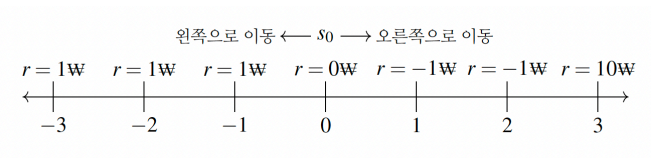

In [ ]:
class MyEnv(gym.Env): #환경
    def __init__(self):
        self.observation_space = gym.spaces.Discrete(7, start=-3) # -3 -2 -1 0 1 2 3
        self.action_space = gym.spaces.Discrete(2) # 왼쪽으로 가거나 오른쪽으로 가거나
        self.num_steps = 0

    def reset(self):
        state = 0 # 0번째 칸에서 시작
        return state

    def step(self, action):
        self.num_steps += 1 #action_cnt<=3

        if action == 0:
            next_state = state - 1
        else:
            next_state = state + 1

        if next_state > 3: # 오른쪽 끝에서는 더이상 못감
            next_state = 3
        elif next_state < -3: # 왼쪽 끝에서는 더이상 못감
            next_state = -3

        reward = {
            -3: 1,
            -2: 1,
            -1: 1,
            0: 0,
            1: -1,
            2: -1,
            3: 10
        }[next_state]

        done = self.num_steps >= 3
        return next_state, reward, done, {}


In [ ]:
import random
class Mypolicy:
  def __init__(self):
      self.Q = [0 for _ in range(9)]
      self.known = [0 for _ in range(9)]

      self.known[0]=-1
      self.known[4]=1
      self.known[8]=-1

  def __call__(self,state):
      q=random.random()
      epsilon = 0.3
      if self.known[state+3]==-1:
          action = 1
      elif self.known[state+5]==-1:
          action = 0
      elif self.known[state+3]+self.known[state+5]==0:
          if q<0.5:
              action = 0
          else:
              action = 1
      elif self.known[state+3]+self.known[state+5]==2:
          if self.Q[state+3]>self.Q[state+5]:
              action = 0
          else:
              action = 1
          if q<epsilon:
              action = 1-action

      else:
          if self.known[state+3]==0:
              action = 1
          else:
              action = 0

          if q<epsilon:
              action = 1-action
      #print(action)
      return action

In [ ]:
agent = Mypolicy()
env = MyEnv()




In [ ]:
for i in range(100):
    state = env.reset()
    reward = 0
    done = False
    env.num_steps=0
    tot_reward = 0
    while not done:
        action=agent(state)
        state, reward, done, _ = env.step(action)
        tot_reward += reward
        if agent.known[state+4]==0:
            agent.known[state+4]=1
            agent.Q[state+4]=reward

    print(tot_reward)

2
2
2
3
3
-2
0
3
3
8
2
3
3
3
3
3
2
3
3
3
3
8
3
3
0
2
3
0
8
3
8
3
8
3
0
3
3
3
3
8
3
2
3
3
3
3
3
3
0
3
3
-2
3
2
8
3
3
0
3
2
0
3
8
8
2
0
3
0
3
-2
3
3
2
3
3
2
8
0
0
3
3
0
0
-2
3
0
-3
-2
-3
2
3
3
0
-2
-2
2
0
3
2
2


In [ ]:
print(agent.Q)
print(agent.known)

[0, 1, 1, 1, 0, -1, -1, 10, 0]
[-1, 1, 1, 1, 1, 1, 1, 1, -1]
